![example](images/director_shot.jpeg)

# Project Title

**Authors:** Doug, Carlos, Michael
***

## What Better Way To Launch Microsoft's New Movie Other Than An Original Blockbuster Series?!



## Business Problem

By creating our own series, we can create more loyal and dedicated fans.
But we must do it right 
-

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [3]:
# Load the necessary data from out dataset

df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz', delimiter = ',')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
# Filter out unnecessary columns 

df_month_year = df[['release_date', 'production_budget','worldwide_gross']]

In [5]:
# Take away '$' from columns with money in order to manipulate the data

df['worldwide_gross'] = df['worldwide_gross'].str[1:]
df['production_budget'] = df['production_budget'].str[1:]
df['domestic_gross'] = df['domestic_gross'].str[1:]

In [6]:
# Remove the commas from the numbers and cast them to int64 using numpy

df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').astype(np.int64)
df['production_budget'] = df['production_budget'].str.replace(',', '').astype(np.int64)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').astype(np.int64)
df_template = df

In [7]:
# Create new columns 'month' and 'year' in order to manipulate the dataset using time released.

df_template['year'] = df['release_date'].str[-4:]
df_template['year'] = pd.to_numeric(df_template['year'])
df_template['month'] = df_template['release_date'].str[:3]

In [8]:
# Drop duplicates from the dataset

df_template = df_template.drop_duplicates(subset='movie')

In [9]:
# Filter the data to fit the criteria for Microsoft's movie launch
# Past 20 years
# Production budget over $1,000,000 (decently funded movies)
# Positive gross at box office

df_month_year = df_template[df_template['year'] > 2000]
df_month_year = df_month_year[df_month_year['production_budget'] > 1000000]
df_month_year = df_month_year[df_month_year['worldwide_gross'] > 0]

In [10]:
# Create our final dataframe that only includes the necessary tables

df_complete = df_month_year[['production_budget','worldwide_gross', 'year', 'month']]

In [11]:
df_2013 = df_complete[df_complete['year'] == 2013]
df_2014 = df_complete[df_complete['year'] == 2014]
df_2015 = df_complete[df_complete['year'] == 2015]
df_2016 = df_complete[df_complete['year'] == 2016]
df_2017 = df_complete[df_complete['year'] == 2017]
df_2018 = df_complete[df_complete['year'] == 2018]

In [12]:
df_2013 = df_2013[['worldwide_gross', 'month']]
df_2013 = df_2013.dropna(subset=['month'])

df_jan2013 = df_2013[df_2013['month'] == 'Jan'].mean().astype(np.int64)
df_feb2013 = df_2013[df_2013['month'] == 'Feb'].mean().astype(np.int64)
df_mar2013 = df_2013[df_2013['month'] == 'Mar'].mean().astype(np.int64)
df_apr2013 = df_2013[df_2013['month'] == 'Apr'].mean().astype(np.int64)
df_may2013 = df_2013[df_2013['month'] == 'May'].mean().astype(np.int64)
df_jun2013 = df_2013[df_2013['month'] == 'Jun'].mean().astype(np.int64)
df_jul2013 = df_2013[df_2013['month'] == 'Jul'].mean().astype(np.int64)
df_aug2013 = df_2013[df_2013['month'] == 'Aug'].mean().astype(np.int64)
df_sep2013 = df_2013[df_2013['month'] == 'Sep'].mean().astype(np.int64)
df_oct2013 = df_2013[df_2013['month'] == 'Oct'].mean().astype(np.int64)
df_nov2013 = df_2013[df_2013['month'] == 'Nov'].mean().astype(np.int64)
df_dec2013 = df_2013[df_2013['month'] == 'Dec'].mean().astype(np.int64)

In [13]:
df_2014 = df_2014[['worldwide_gross', 'month']]
df_2014 = df_2014.dropna(subset=['month'])

df_jan2014 = df_2014[df_2014['month'] == 'Jan'].mean().astype(np.int64)
df_feb2014 = df_2014[df_2014['month'] == 'Feb'].mean().astype(np.int64)
df_mar2014 = df_2014[df_2014['month'] == 'Mar'].mean().astype(np.int64)
df_apr2014 = df_2014[df_2014['month'] == 'Apr'].mean().astype(np.int64)
df_may2014 = df_2014[df_2014['month'] == 'May'].mean().astype(np.int64)
df_jun2014 = df_2014[df_2014['month'] == 'Jun'].mean().astype(np.int64)
df_jul2014 = df_2014[df_2014['month'] == 'Jul'].mean().astype(np.int64)
df_aug2014 = df_2014[df_2014['month'] == 'Aug'].mean().astype(np.int64)
df_sep2014 = df_2014[df_2014['month'] == 'Sep'].mean().astype(np.int64)
df_oct2014 = df_2014[df_2014['month'] == 'Oct'].mean().astype(np.int64)
df_nov2014 = df_2014[df_2014['month'] == 'Nov'].mean().astype(np.int64)
df_dec2014 = df_2014[df_2014['month'] == 'Dec'].mean().astype(np.int64)

In [14]:
df_2015 = df_2015[['worldwide_gross', 'month']]
df_2015 = df_2015.dropna(subset=['month'])

df_jan2015 = df_2015[df_2015['month'] == 'Jan'].mean().astype(np.int64)
df_feb2015 = df_2015[df_2015['month'] == 'Feb'].mean().astype(np.int64)
df_mar2015 = df_2015[df_2015['month'] == 'Mar'].mean().astype(np.int64)
df_apr2015 = df_2015[df_2015['month'] == 'Apr'].mean().astype(np.int64)
df_may2015 = df_2015[df_2015['month'] == 'May'].mean().astype(np.int64)
df_jun2015 = df_2015[df_2015['month'] == 'Jun'].mean().astype(np.int64)
df_jul2015 = df_2015[df_2015['month'] == 'Jul'].mean().astype(np.int64)
df_aug2015 = df_2015[df_2015['month'] == 'Aug'].mean().astype(np.int64)
df_sep2015 = df_2015[df_2015['month'] == 'Sep'].mean().astype(np.int64)
df_oct2015 = df_2015[df_2015['month'] == 'Oct'].mean().astype(np.int64)
df_nov2015 = df_2015[df_2015['month'] == 'Nov'].mean().astype(np.int64)
df_dec2015 = df_2015[df_2015['month'] == 'Dec'].mean().astype(np.int64)

In [15]:
df_2016 = df_2016[['worldwide_gross', 'month']]
df_2016 = df_2016.dropna(subset=['month'])

df_jan2016 = df_2016[df_2016['month'] == 'Jan'].mean().astype(np.int64)
df_feb2016 = df_2016[df_2016['month'] == 'Feb'].mean().astype(np.int64)
df_mar2016 = df_2016[df_2016['month'] == 'Mar'].mean().astype(np.int64)
df_apr2016 = df_2016[df_2016['month'] == 'Apr'].mean().astype(np.int64)
df_may2016 = df_2016[df_2016['month'] == 'May'].mean().astype(np.int64)
df_jun2016 = df_2016[df_2016['month'] == 'Jun'].mean().astype(np.int64)
df_jul2016 = df_2016[df_2016['month'] == 'Jul'].mean().astype(np.int64)
df_aug2016 = df_2016[df_2016['month'] == 'Aug'].mean().astype(np.int64)
df_sep2016 = df_2016[df_2016['month'] == 'Sep'].mean().astype(np.int64)
df_oct2016 = df_2016[df_2016['month'] == 'Oct'].mean().astype(np.int64)
df_nov2016 = df_2016[df_2016['month'] == 'Nov'].mean().astype(np.int64)
df_dec2016 = df_2016[df_2016['month'] == 'Dec'].mean().astype(np.int64)

In [16]:
df_2017 = df_2017[['worldwide_gross', 'month']]
df_2017 = df_2017.dropna(subset=['month'])

df_jan2017 = df_2017[df_2017['month'] == 'Jan'].mean().astype(np.int64)
df_feb2017 = df_2017[df_2017['month'] == 'Feb'].mean().astype(np.int64)
df_mar2017 = df_2017[df_2017['month'] == 'Mar'].mean().astype(np.int64)
df_apr2017 = df_2017[df_2017['month'] == 'Apr'].mean().astype(np.int64)
df_may2017 = df_2017[df_2017['month'] == 'May'].mean().astype(np.int64)
df_jun2017 = df_2017[df_2017['month'] == 'Jun'].mean().astype(np.int64)
df_jul2017 = df_2017[df_2017['month'] == 'Jul'].mean().astype(np.int64)
df_aug2017 = df_2017[df_2017['month'] == 'Aug'].mean().astype(np.int64)
df_sep2017 = df_2017[df_2017['month'] == 'Sep'].mean().astype(np.int64)
df_oct2017 = df_2017[df_2017['month'] == 'Oct'].mean().astype(np.int64)
df_nov2017 = df_2017[df_2017['month'] == 'Nov'].mean().astype(np.int64)
df_dec2017 = df_2017[df_2017['month'] == 'Dec'].mean().astype(np.int64)

In [17]:
df_2018 = df_2018[['worldwide_gross', 'month']]
df_2018 = df_2018.dropna(subset=['month'])

df_jan2018 = df_2018[df_2018['month'] == 'Jan'].mean().astype(np.int64)
df_feb2018 = df_2018[df_2018['month'] == 'Feb'].mean().astype(np.int64)
df_mar2018 = df_2018[df_2018['month'] == 'Mar'].mean().astype(np.int64)
df_apr2018 = df_2018[df_2018['month'] == 'Apr'].mean().astype(np.int64)
df_may2018 = df_2018[df_2018['month'] == 'May'].mean().astype(np.int64)
df_jun2018 = df_2018[df_2018['month'] == 'Jun'].mean().astype(np.int64)
df_jul2018 = df_2018[df_2018['month'] == 'Jul'].mean().astype(np.int64)
df_aug2018 = df_2018[df_2018['month'] == 'Aug'].mean().astype(np.int64)
df_sep2018 = df_2018[df_2018['month'] == 'Sep'].mean().astype(np.int64)
df_oct2018 = df_2018[df_2018['month'] == 'Oct'].mean().astype(np.int64)
df_nov2018 = df_2018[df_2018['month'] == 'Nov'].mean().astype(np.int64)
df_dec2018 = df_2018[df_2018['month'] == 'Dec'].mean().astype(np.int64)

In [18]:
mean_2013 = [df_jan2013[0], df_feb2013[0], df_mar2013[0], df_apr2013[0], df_may2013[0], df_jun2013[0],\
             df_jul2013[0], df_aug2013[0], df_sep2013[0], df_oct2013[0], df_nov2013[0], df_dec2013[0]]
mean_2014 = [df_jan2014[0], df_feb2014[0], df_mar2014[0], df_apr2014[0], df_may2014[0], df_jun2014[0],\
             df_jul2014[0], df_aug2014[0], df_sep2014[0], df_oct2014[0], df_nov2014[0], df_dec2014[0]]
mean_2015 = [df_jan2015[0], df_feb2015[0], df_mar2015[0], df_apr2015[0], df_may2015[0], df_jun2015[0],\
             df_jul2015[0], df_aug2015[0], df_sep2015[0], df_oct2015[0], df_nov2015[0], df_dec2015[0]]
mean_2016 = [df_jan2016[0], df_feb2016[0], df_mar2016[0], df_apr2016[0], df_may2016[0], df_jun2016[0],\
             df_jul2016[0], df_aug2016[0], df_sep2016[0], df_oct2016[0], df_nov2016[0], df_dec2016[0]]
mean_2017 = [df_jan2017[0], df_feb2017[0], df_mar2017[0], df_apr2017[0], df_may2017[0], df_jun2017[0],\
             df_jul2017[0], df_aug2017[0], df_sep2017[0], df_oct2017[0], df_nov2017[0], df_dec2017[0]]
mean_2018 = [df_jan2018[0], df_feb2018[0], df_mar2018[0], df_apr2018[0], df_may2018[0], df_jun2018[0],\
             df_jul2018[0], df_aug2018[0], df_sep2018[0], df_oct2018[0], df_nov2018[0], df_dec2018[0]]

In [20]:
# Order month by order in the calender then sort the calenders in order from Jan-Dec

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_complete['month'] = pd.Categorical(df_complete['month'], categories=months, ordered=True)
df_complete = df_complete['month'].sort_values()
df_complete = list(df_complete)

<ipython-input-20-86ae6a9fcf17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['month'] = pd.Categorical(df_complete['month'], categories=months, ordered=True)


In [22]:
# Initialize new dataframe with 1 row, 12 columns with value: 0 to read frequency of each month

column_names = months
a = np.zeros(shape=(1,12), dtype = int)
df_months = pd.DataFrame(a, columns = column_names)

for x in df_complete:
    if x in column_names:
        df_months[x] += 1

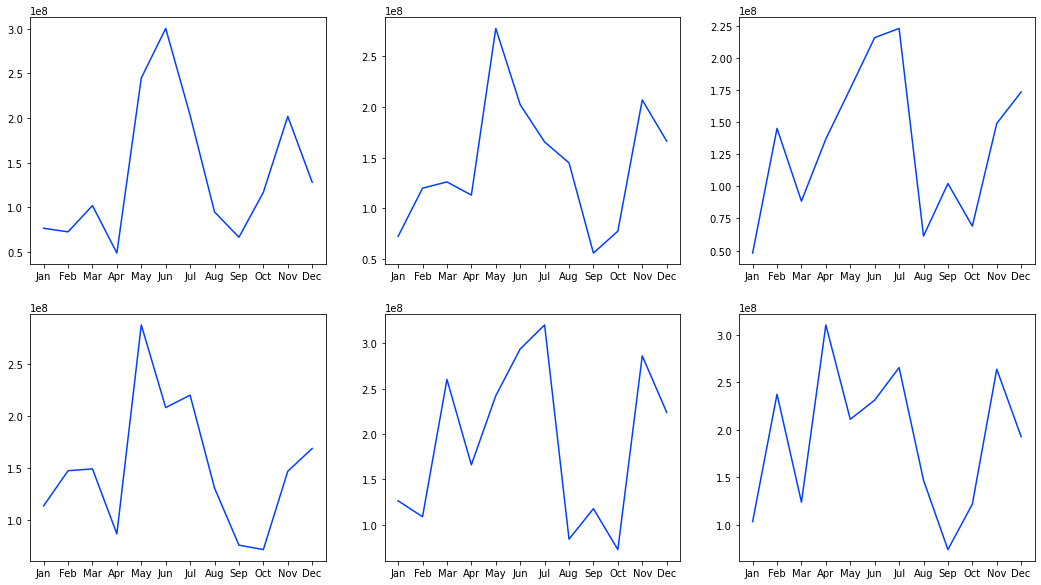

In [23]:
plt.style.use('seaborn-bright')
fig, ax = plt.subplots(2, 3, figsize = (18, 10))
x= column_names
ax[0,0].plot(x, mean_2013)
ax[0,1].plot(x, mean_2014)
ax[0,2].plot(x, mean_2015)
ax[1,0].plot(x, mean_2016)
ax[1,1].plot(x, mean_2017)
ax[1,2].plot(x, mean_2018)
#sns.barplot(x, y);

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# In order to model this data, we had to first create new columns to represent the different months within a year.
# We then iterated through our old dataset and populated our new 'months_df' dataset to find the frequency

In [ ]:
# Order month by order in the calender then sort the calenders in order from Jan-Dec

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_complete['month'] = pd.Categorical(df_complete['month'], categories=months, ordered=True)
df_complete = df_complete['month'].sort_values()
df_complete = list(df_complete)

In [ ]:
# Initialize new dataframe with 1 row, 12 columns with value: 0 to read frequency of each month

column_names = months
a = np.zeros(shape=(1,12), dtype = int)
df_months = pd.DataFrame(a, columns = column_names)

for x in df_complete:
    if x in column_names:
        df_months[x] += 1

In [ ]:
# Get the values from this function and copy them below *here*

list(df_months.value_counts().index)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn-bright')
fig, ax = plt.subplots(figsize = (10, 10))
x = months
#y = [*here*]
y = [214, 264, 304, 304, 249, 274, 261, 298, 328, 353, 305, 392]
sns.barplot(x, y);
ax.set_title('Total number of movie releases by month')
ax.set_xlabel('Data from 2001 - 2020')
ax.set_ylabel('Number of movies released');

In [ ]:
# The best window to release our blockbuster action / drama/ suspense film is releasing during the holiday season.
# This distribution shows that other big name movie production companies release later in the year.

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***